In [1]:
from __future__ import print_function, division
import jupyterthemes.jtplot as jtplot
jtplot.style()
import numpy as np
import pandas as pd
import matplotlib as mpl
import os, shutil, random, sys
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(suppress=True)

In [10]:
train_data = pd.read_csv('Week2_Iris鸢尾花数据集/TrainData.csv').values
test_data = pd.read_csv('Week2_Iris鸢尾花数据集/TestData.csv').values

# keras基本方法

In [3]:
from keras.models import Sequential, Model
from keras.utils import to_categorical  # one_hot编码
from keras.layers import Dense
from keras.layers import Flatten, Activation, Dropout  # 特殊功能层
from keras.optimizers import Adadelta, Adam, RMSprop
from keras import losses, metrics

Using TensorFlow backend.


In [4]:
X_train = train_data[:,:4]
y_train = to_categorical(train_data[:,4])
X_test = test_data[:,:4]
test_y = test_data[:,4]
y_test = to_categorical(test_data[:,4])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


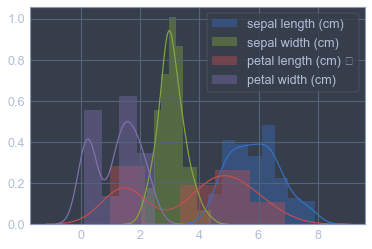

In [13]:
sns.distplot(X_train[:,0],label='sepal length (cm)')
sns.distplot(X_train[:,1],label='sepal width (cm)')
sns.distplot(X_train[:,2],label='petal length (cm) 	')
sns.distplot(X_train[:,3],label='petal width (cm)')
plt.legend()
plt.show()

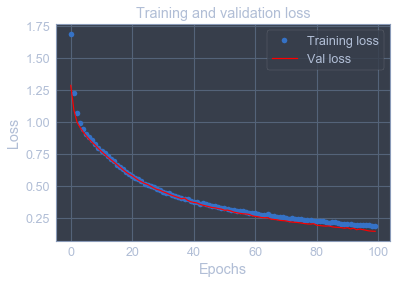

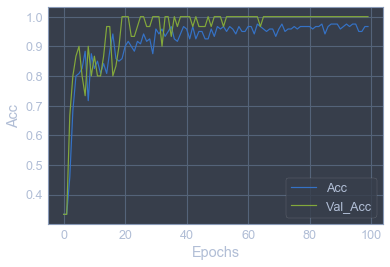

In [31]:
# 搭建网络
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(3, input_dim=64, activation='softmax'))

# 编译模型
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 训练模型
cost = model.fit(X_train,
                 y_train,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 verbose=0)

loss = cost.history['loss']
val_loss = cost.history['val_loss']
acc = cost.history['accuracy']
val_acc = cost.history['val_accuracy']

plt.plot(loss, 'bo', label='Training loss')
plt.plot(val_loss, label='Val loss', color='red')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(acc, label='Acc')
plt.plot(val_acc, label='Val_Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

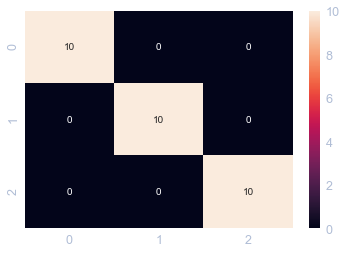

In [25]:
y_pred = model.predict_classes(X_test)

c = confusion_matrix(test_y,y_pred,labels=[0.,1.,2.])
sns.heatmap(c,annot=True)
plt.show()

# 增加层数

## 基本

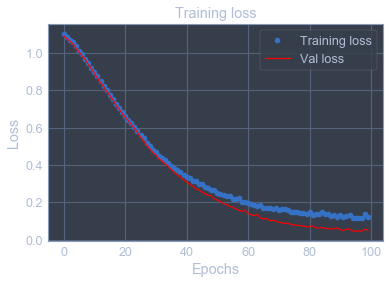

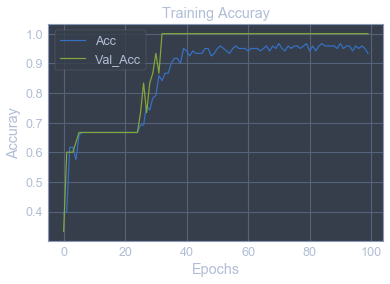

In [32]:
# 搭建网络
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(64, input_dim=32, activation='relu'))
model.add(Dense(8, input_dim=64, activation='relu'))
model.add(Dense(3, input_dim=64, activation='softmax'))

# 编译模型
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 训练模型
cost = model.fit(X_train,
                 y_train,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 verbose=0)

loss = cost.history['loss']
val_loss = cost.history['val_loss']
acc = cost.history['accuracy']
val_acc = cost.history['val_accuracy']

plt.plot(loss, 'bo', label='Training loss')
plt.plot(val_loss, label='Val loss', color='red')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(acc, label='Acc')
plt.plot(val_acc, label='Val_Acc')
plt.title('Training Accuray')
plt.xlabel('Epochs')
plt.ylabel('Accuray')
plt.legend()
plt.show()

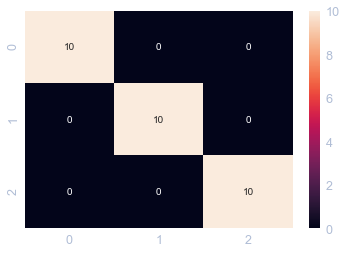

In [9]:
y_pred = model.predict_classes(X_test)
c = confusion_matrix(test_y, y_pred, labels=[0., 1., 2.])
sns.heatmap(c, annot=True)
plt.show()

## 增加层数同时改变迭代次数

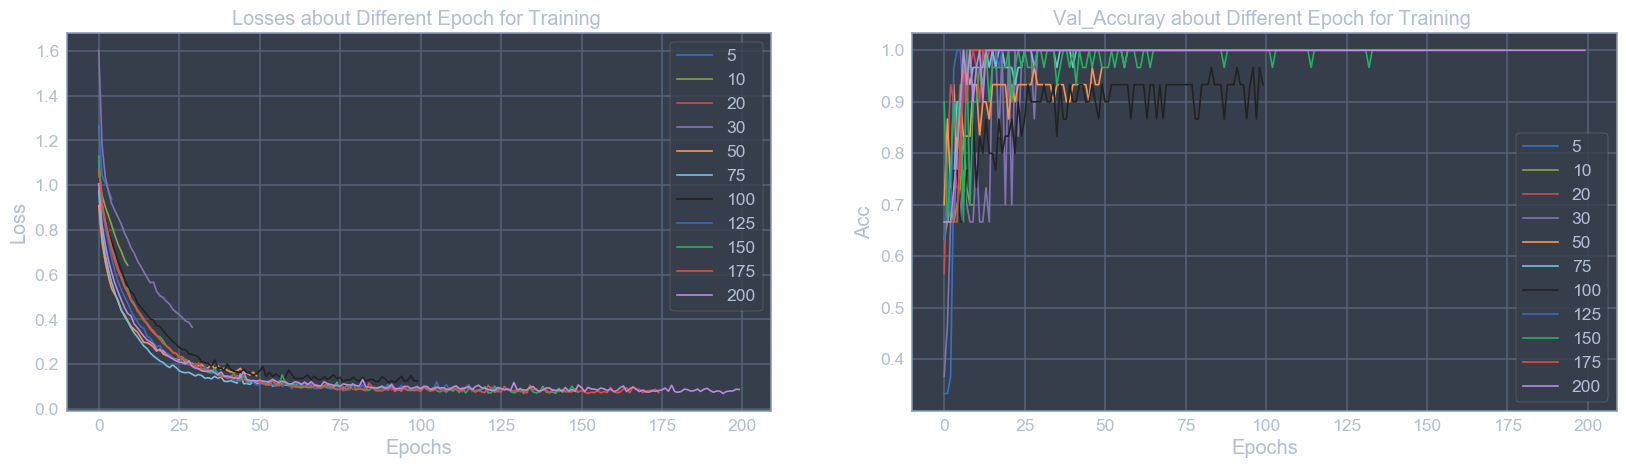

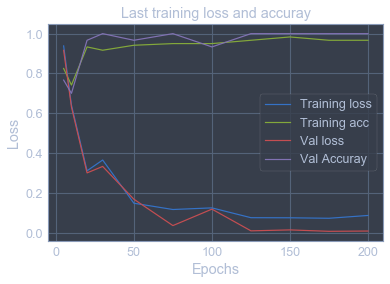

In [44]:
# 搭建网络
losses = []
accs = []
val_losses = []
val_accs = []

epochs = [5, 10, 20, 30, 50, 75, 100, 125, 150, 175, 200]

figure, axes = plt.subplots(ncols=2, nrows=1,figsize=(20,5),dpi=100)
# 绘图对象
ax1 = axes[0]
ax2 = axes[1]

for epoch in epochs:
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(32, input_dim=8, activation='relu'))
    model.add(Dense(64, input_dim=32, activation='relu'))
    model.add(Dense(3, input_dim=64, activation='softmax'))

    # 编译模型
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # 训练模型
    cost = model.fit(
        X_train,
        y_train,
        epochs=epoch,
        verbose=0,
        validation_data=(X_test, y_test),
    )

    losses.append(cost.history['loss'][-1])
    accs.append(cost.history['accuracy'][-1])
    val_losses.append(cost.history['val_loss'][-1])
    val_accs.append(cost.history['val_accuracy'][-1])
    
    ax1.plot(cost.history['loss'],label='%s'%str(epoch))
    ax2.plot(cost.history['val_accuracy'],label='%s'%str(epoch))
    
ax1.set_title('Losses about Different Epoch for Training ')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()


ax2.set_title('Val_Accuray about Different Epoch for Training ')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Acc')
ax2.legend()   

plt.show()
    
plt.plot(epochs, losses, label='Training loss')
plt.plot(epochs, accs, label='Training acc')
plt.plot(epochs,val_losses,label = 'Val loss')
plt.plot(epochs,val_accs,label='Val Accuray')
plt.title('Last training loss and accuray')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

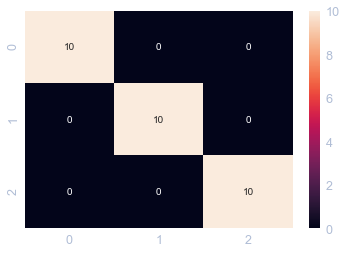

In [27]:
y_pred = model.predict_classes(X_test)
c = confusion_matrix(test_y,y_pred,labels=[0.,1.,2.])
sns.heatmap(c,annot=True)
plt.show()

# 增加神经元

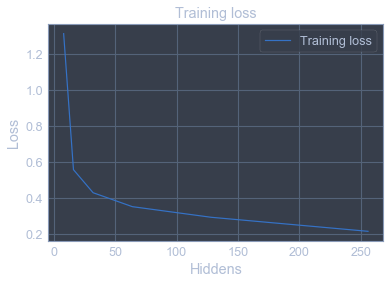

In [18]:
# 搭建网络
hiddens = [8, 16, 32, 64, 128, 256]
losses = []
for hidden in hiddens:
    model = Sequential()
    model.add(Dense(hidden, input_dim=4, activation='relu'))
    model.add(Dense(3, input_dim=hidden, activation='softmax'))

    # 编译模型
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # 训练模型
    cost = model.fit(X_train, y_train, epochs=50, verbose=0)

    losses.append(cost.history['loss'][-1])

plt.plot(hiddens, losses, label='Training loss')
plt.title('Training loss')
plt.xlabel('Hiddens')
plt.ylabel('Loss')
plt.legend()
plt.show()

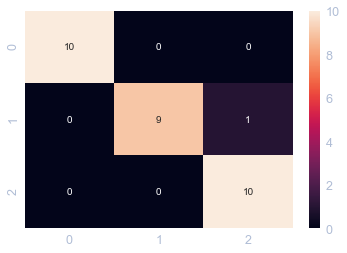

In [19]:
y_pred = model.predict_classes(X_test)
c = confusion_matrix(test_y,y_pred,labels=[0.,1.,2.])
sns.heatmap(c,annot=True)
plt.show()

# 改变优化函数

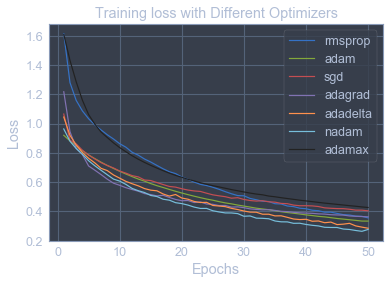

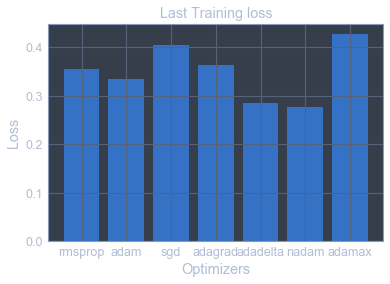

In [31]:
# 搭建网络
opts = ['rmsprop', 'adam', 'sgd', 'adagrad', 'adadelta','nadam','adamax']
losses = []
for opt in opts:
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation='relu'))
    model.add(Dense(3, input_dim=64, activation='softmax'))

    # 编译模型
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # 训练模型
    cost = model.fit(X_train, y_train, epochs=50, verbose=0)

    losses.append(cost.history['loss'][-1])
    loss = cost.history['loss']
    epochs = range(1, 50 + 1)
    plt.plot(epochs, loss, label='%s' % opt)

plt.title('Training loss with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.bar(opts, losses)
plt.title('Last Training loss')
plt.xlabel('Optimizers')
plt.ylabel('Loss')
plt.show()

# 改变batch_size

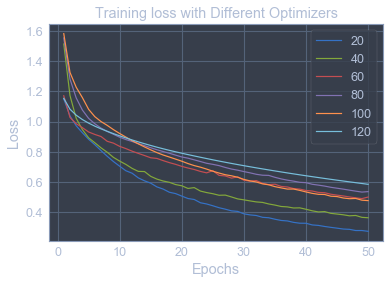

In [17]:
# 搭建网络
batches = [20,40,60,80,100,120]
losses = []
for batch in batches:
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation='relu'))
    model.add(Dense(3, input_dim=64, activation='softmax'))

    # 编译模型
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # 训练模型
    cost = model.fit(X_train, y_train, epochs=50, verbose=0,batch_size=batch)

    losses.append(cost.history['loss'][-1])
    loss = cost.history['loss']
    epochs = range(1, 50 + 1)
    plt.plot(epochs, loss, label='%s' % str(batch))

plt.title('Training loss with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()